In [131]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [1]:
pip install pandoc

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 3.5 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33261 sha256=d44c3cb982e23eb2469871a0f32255744211cfa1bf2b36f9b90a5f27e0086f35
  Stored in directory: /Users/pengyuyang/Library/Caches/pip/wheels/df/68/e2/574df0737a398965be3a1977499bbda7a841a4605d8dda34d2
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.


import dataset

In [132]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [133]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

We need to do some data cleaning

In [134]:
# Replace '<=50K.' with '<=50K' and '>50K.' with '>50K'
y['income'] = y['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

# Now check unique values again
print(y['income'].unique())


['<=50K' '>50K']


In [135]:
X[X == '?'] = np.nan

In [136]:
for col in ['workclass', 'occupation', 'native-country']:
    X[col].fillna(X[col].mode()[0], inplace=True)

In [137]:
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

Split training and test data

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Convert categorial value into numeric

In [139]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


Feature scaling

In [140]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

Logistic regression with all features

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with all the features: 0.8220


In [142]:
accuracy

0.8219879209745112

In [143]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[6991  447]
 [1292 1039]]


In [144]:
from sklearn.metrics import precision_score
precision = precision_score(y_test['income'], y_pred, pos_label='>50K')
print("Precision:", precision)


Precision: 0.699192462987887


In [145]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test['income'], y_pred, pos_label='>50K')
print("F1 Score:", f1)



F1 Score: 0.5444066020434897


Logistic regression going with PCA

In [146]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
explained_variance_ratios = pca.explained_variance_ratio_

In [147]:
explained_variance_ratios

array([0.14750401, 0.10190144, 0.08034301, 0.07903557, 0.07451572,
       0.0735265 , 0.07025107, 0.06768005, 0.06479107, 0.06059329,
       0.06018399, 0.04925709, 0.04289854, 0.02751866])

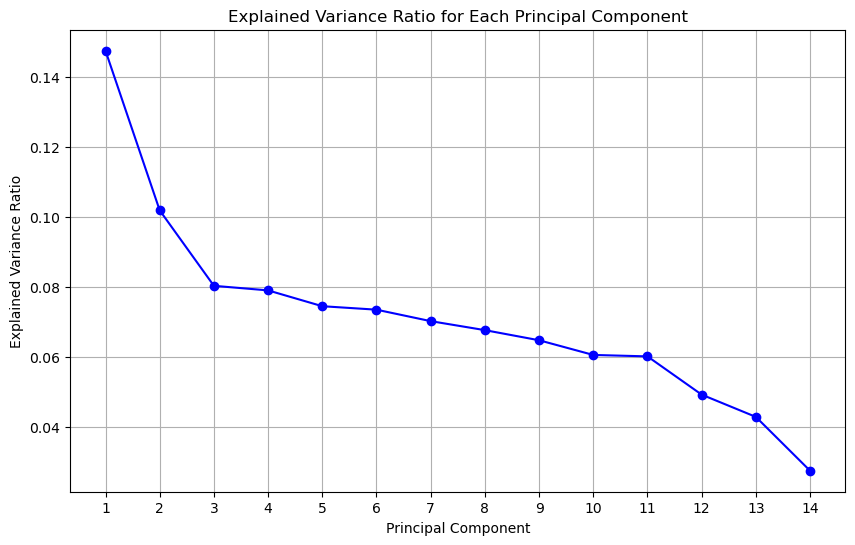

In [148]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, marker='o', color='blue', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.grid(True)
plt.show()

Cumulative graph

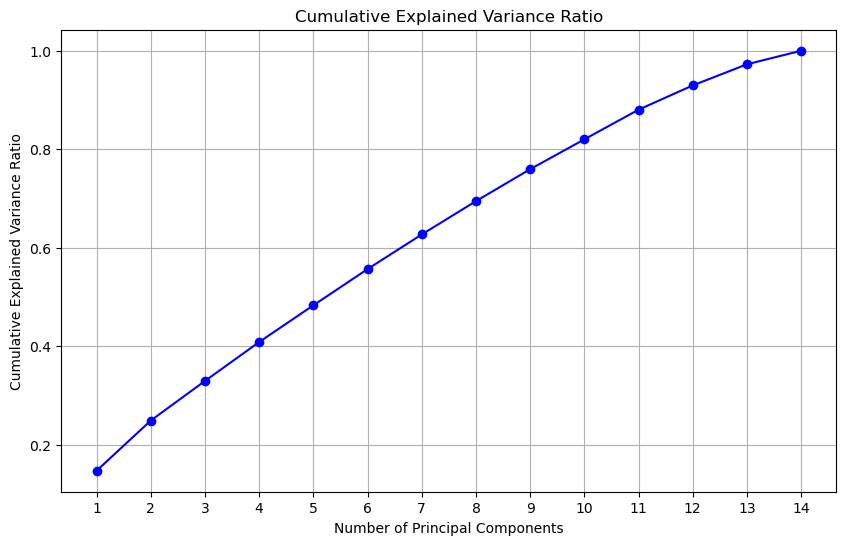

In [149]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratios)

# Plotting the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='blue', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_variance_ratio) + 1))
plt.grid(True)
plt.show()

In [150]:
pca1 = PCA(n_components=12)

# Fit PCA to training data and transform both training and testing data
X_train_pca = pca1.fit_transform(X_train)
X_test_pca = pca1.transform(X_test)

# Initialize logistic regression model
logistic_reg = LogisticRegression()

# Train logistic regression model on transformed training data
logistic_reg.fit(X_train_pca, y_train)

# Predict on transformed testing data
y_pred_pca = logistic_reg.predict(X_test_pca)

# Calculate accuracy score
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy:", accuracy_pca)

Accuracy: 0.6714095608557682


In [151]:
from sklearn.metrics import precision_score
precision_pca = precision_score(y_test['income'], y_pred_pca, pos_label='>50K')
print("Precision:", precision_pca)

Precision: 0.3432037103103817


In [152]:
from sklearn.metrics import confusion_matrix
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
print("Confusion Matrix:")
print(conf_matrix_pca)

Confusion Matrix:
[[5597 1841]
 [1369  962]]


In [153]:
from sklearn.metrics import f1_score
f1_pca = f1_score(y_test['income'], y_pred_pca, pos_label='>50K')
print("F1 Score:", f1_pca)

F1 Score: 0.37475652512660695


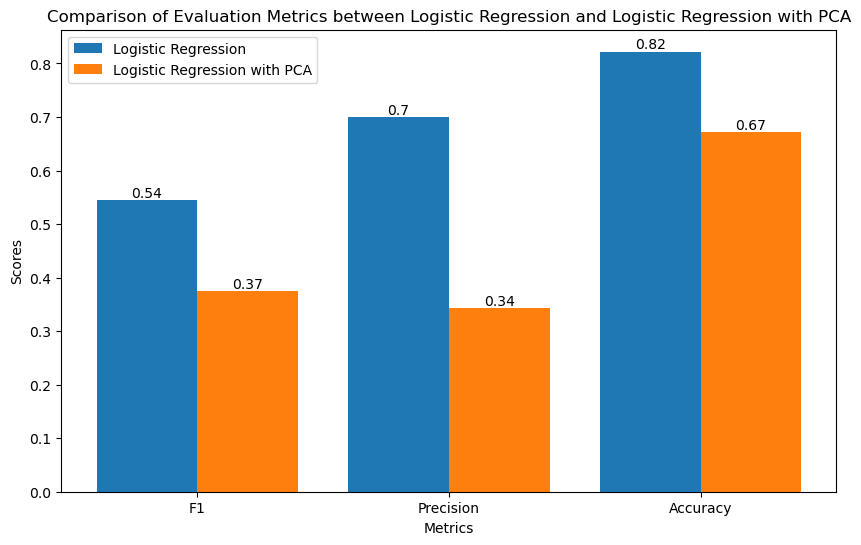

In [154]:
labels = ['F1', 'Precision', 'Accuracy']
logreg_scores = [f1, precision, accuracy]
pca_scores = [f1_pca, precision_pca, accuracy_pca]

# Plotting
x = range(len(labels))

plt.figure(figsize=(10, 6))

# Plotting bars
bars1 = plt.bar(x, logreg_scores, width=0.4, label='Logistic Regression')
bars2 = plt.bar([i + 0.4 for i in x], pca_scores, width=0.4, label='Logistic Regression with PCA')

# Adding numbers on top of bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Evaluation Metrics between Logistic Regression and Logistic Regression with PCA')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()

plt.show()

Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7222847783805917


In [45]:
decision_tree.fit(X_train_pca, y_train)

# Predict on transformed testing data
y_pred = decision_tree.predict(X_test_pca)

# Calculate accuracy score
accuracy_tree_pca = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7138908793121097
